# AIR QUAILITY PREDICTION USING LINEAR REGRESSION

# DATA SET SELECTION AND IMPORTING FUNCTIONS

IMPORTING THE REQUIRED LIBRARIES AND FUNCTIONS

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import seaborn as sns
rcParams['figure.figsize']=10,8
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error


Now were going to read the dataset provided by uci machine learning repository on air quality index

Reading the dataset

In [ ]:
df = pd.read_excel("AirQualityUCI.xlsx")

# DATA SET ANALYSIS

Now showing a sample of the contents in the dataset provided by uci machine learning repository

In [ ]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


Finding out the shape of the dataset

In [ ]:
df.shape

(9357, 15)

Observing the mean of the dataset

In [ ]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CO(GT)            -34.207524
PT08.S1(CO)      1048.869652
NMHC(GT)         -159.090093
C6H6(GT)            1.865576
PT08.S2(NMHC)     894.475963
NOx(GT)           168.604200
PT08.S3(NOx)      794.872333
NO2(GT)            58.135898
PT08.S4(NO2)     1391.363266
PT08.S5(O3)       974.951534
T                   9.776600
RH                 39.483611
AH                 -6.837604
dtype: float64

Observing the standard deviation of the dataset

In [ ]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Date             112 days 13:17:28.294221482
CO(GT)                              77.65717
PT08.S1(CO)                       329.817015
NMHC(GT)                          139.789093
C6H6(GT)                           41.380154
PT08.S2(NMHC)                     342.315902
NOx(GT)                           257.424561
PT08.S3(NOx)                      321.977031
NO2(GT)                           126.931428
PT08.S4(NO2)                      467.192382
PT08.S5(O3)                       456.922728
T                                  43.203438
RH                                 51.215645
AH                                  38.97667
dtype: object

Getting the information regarding all the attributes of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           9357 non-null   datetime64[ns]
 1   Time           9357 non-null   object        
 2   CO(GT)         9357 non-null   float64       
 3   PT08.S1(CO)    9357 non-null   float64       
 4   NMHC(GT)       9357 non-null   int64         
 5   C6H6(GT)       9357 non-null   float64       
 6   PT08.S2(NMHC)  9357 non-null   float64       
 7   NOx(GT)        9357 non-null   float64       
 8   PT08.S3(NOx)   9357 non-null   float64       
 9   NO2(GT)        9357 non-null   float64       
 10  PT08.S4(NO2)   9357 non-null   float64       
 11  PT08.S5(O3)    9357 non-null   float64       
 12  T              9357 non-null   float64       
 13  RH             9357 non-null   float64       
 14  AH             9357 non-null   float64       
dtypes: datetime64[ns](1),

checking for null rows and interpreting the dependent feature

In [ ]:
df.count()


Date             9357
Time             9357
CO(GT)           9357
PT08.S1(CO)      9357
NMHC(GT)         9357
C6H6(GT)         9357
PT08.S2(NMHC)    9357
NOx(GT)          9357
PT08.S3(NOx)     9357
NO2(GT)          9357
PT08.S4(NO2)     9357
PT08.S5(O3)      9357
T                9357
RH               9357
AH               9357
dtype: int64

In [ ]:
df.isnull().any()

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

In [ ]:
df.RH.value_counts()

-200.000000    366
 47.750000      11
 51.450000       9
 49.675000       8
 55.950000       8
              ... 
 55.474999       1
 61.750000       1
 25.600000       1
 26.350000       1
 18.350000       1
Name: RH, Length: 4903, dtype: int64

In [ ]:
df['RH'].unique()

array([48.87500095, 47.69999981, 53.97500038, ..., 33.04999971,
       58.89999866, 18.34999967])

Drawing a pairplot

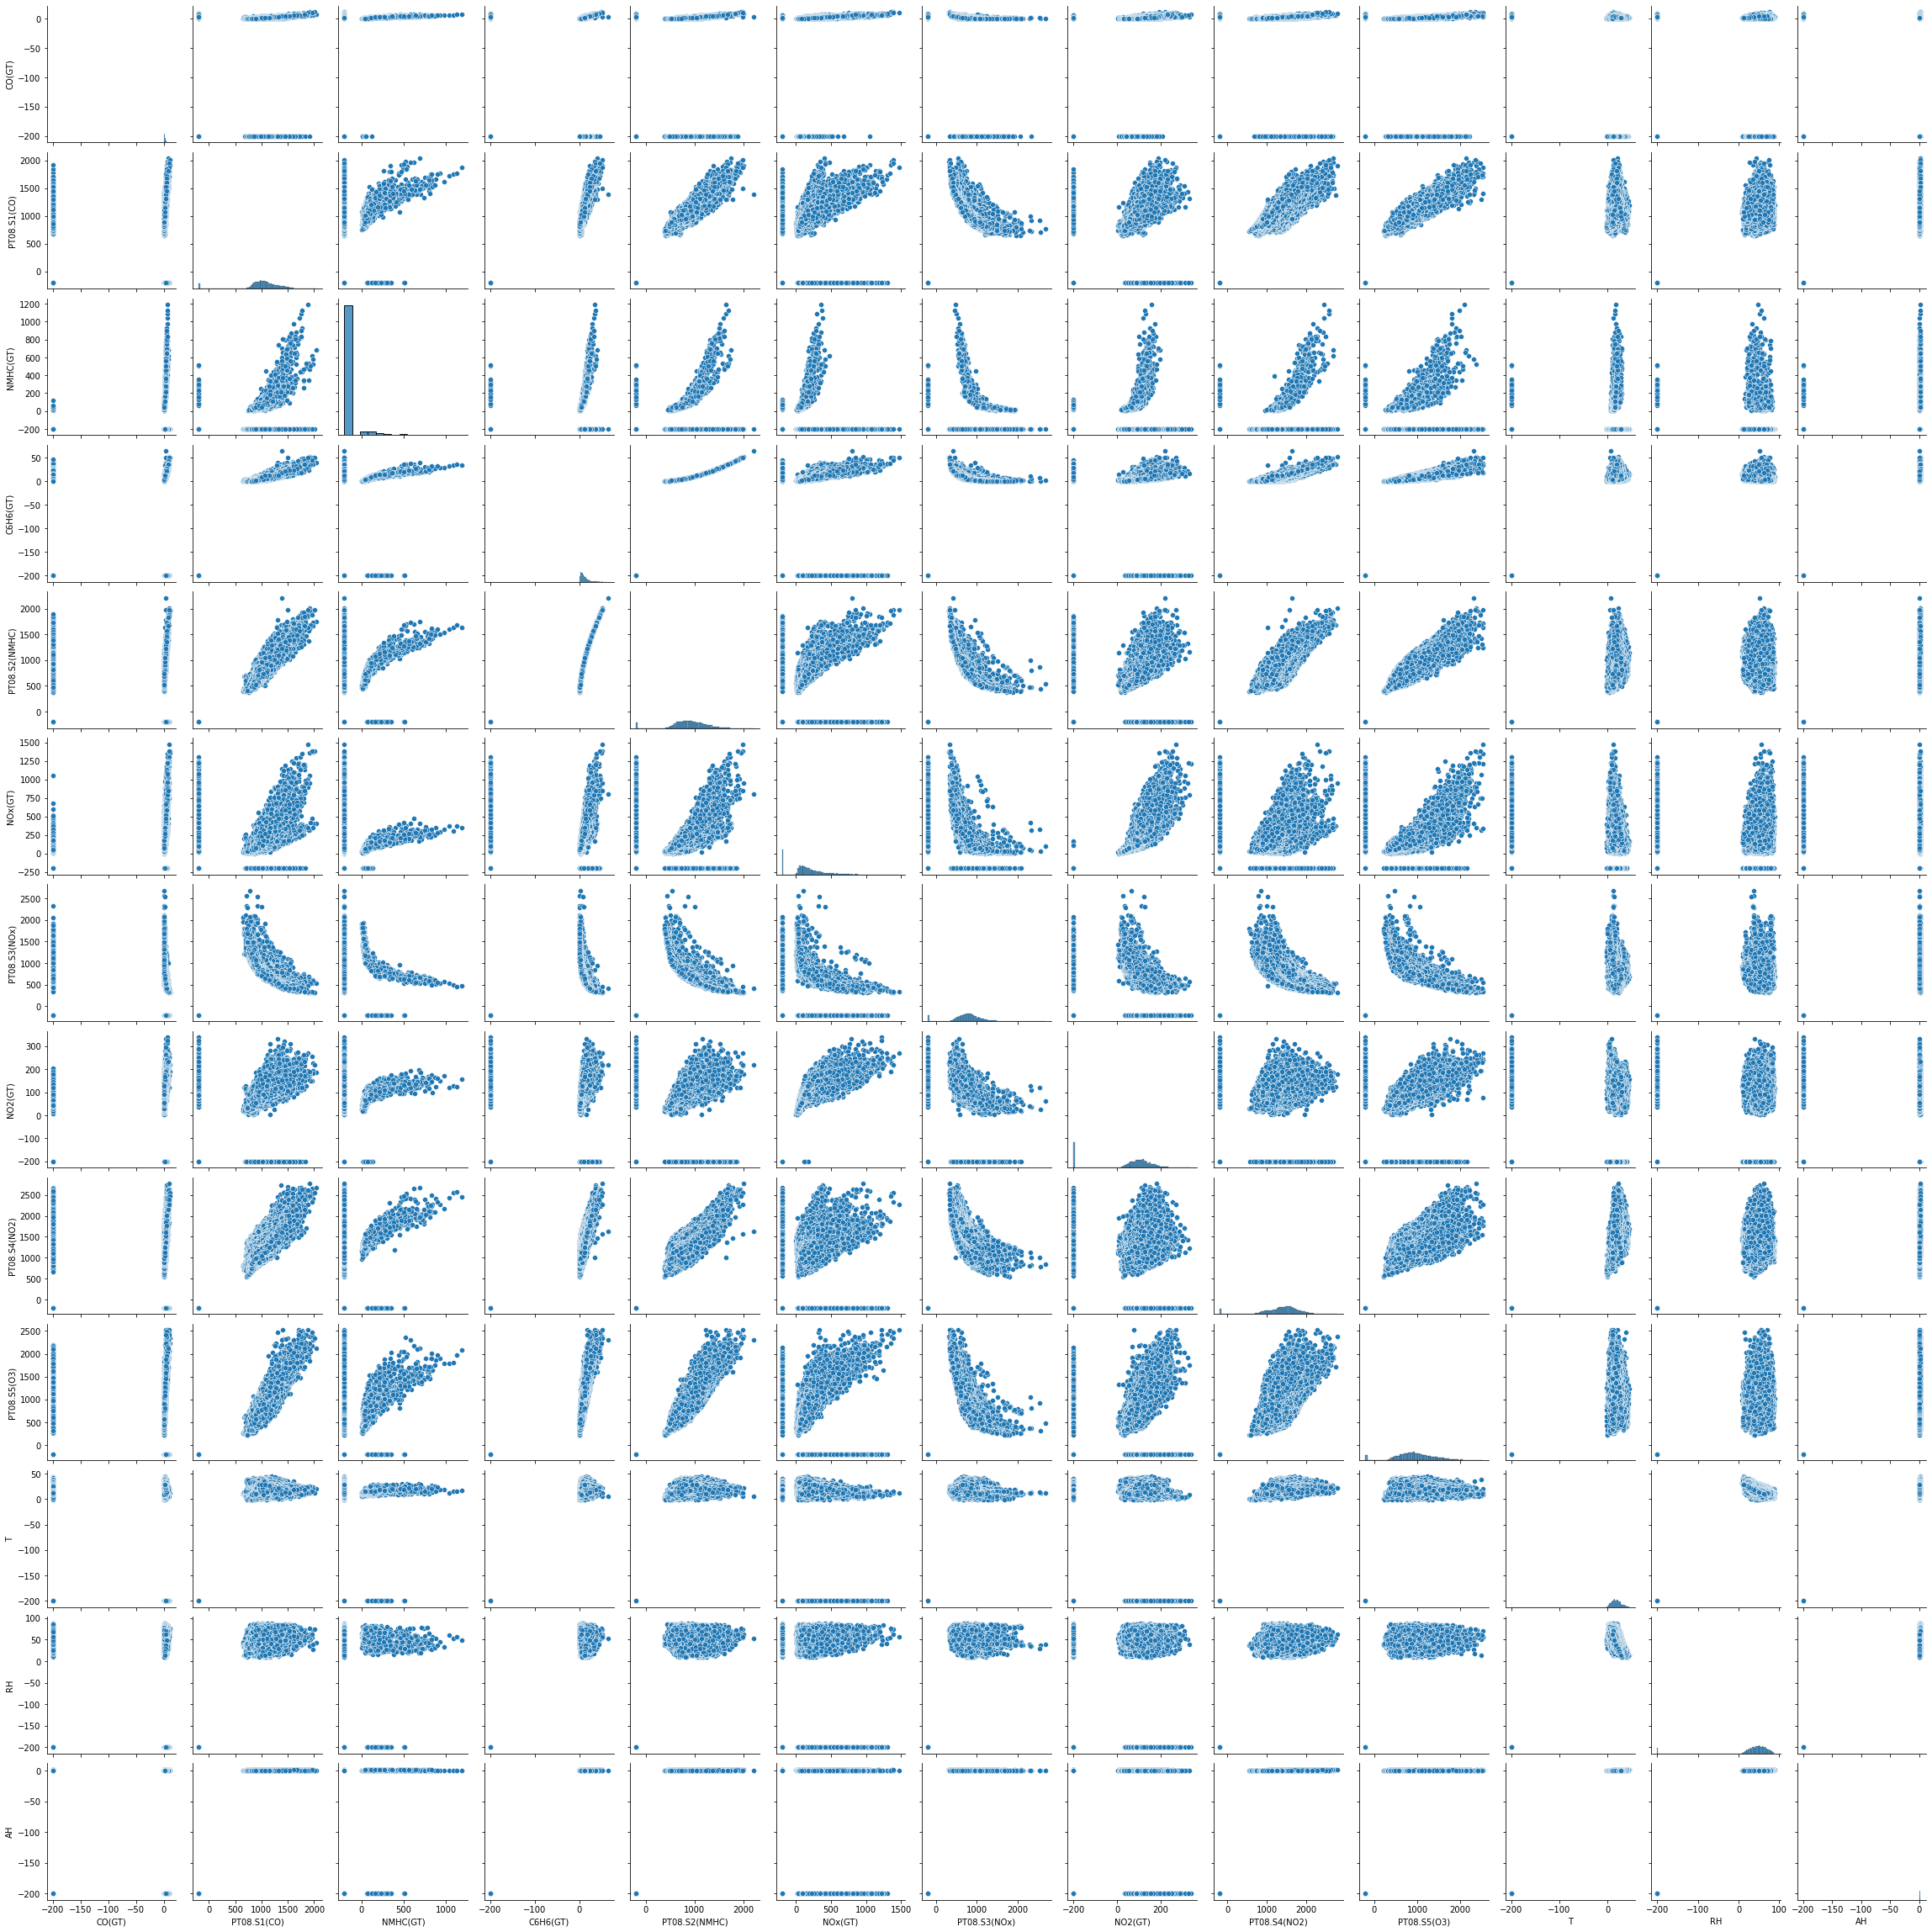

In [ ]:
sns.pairplot(df)

# DATA PREPROCESSING

In [ ]:
df = df.drop(['Time','Date'],axis = 1)

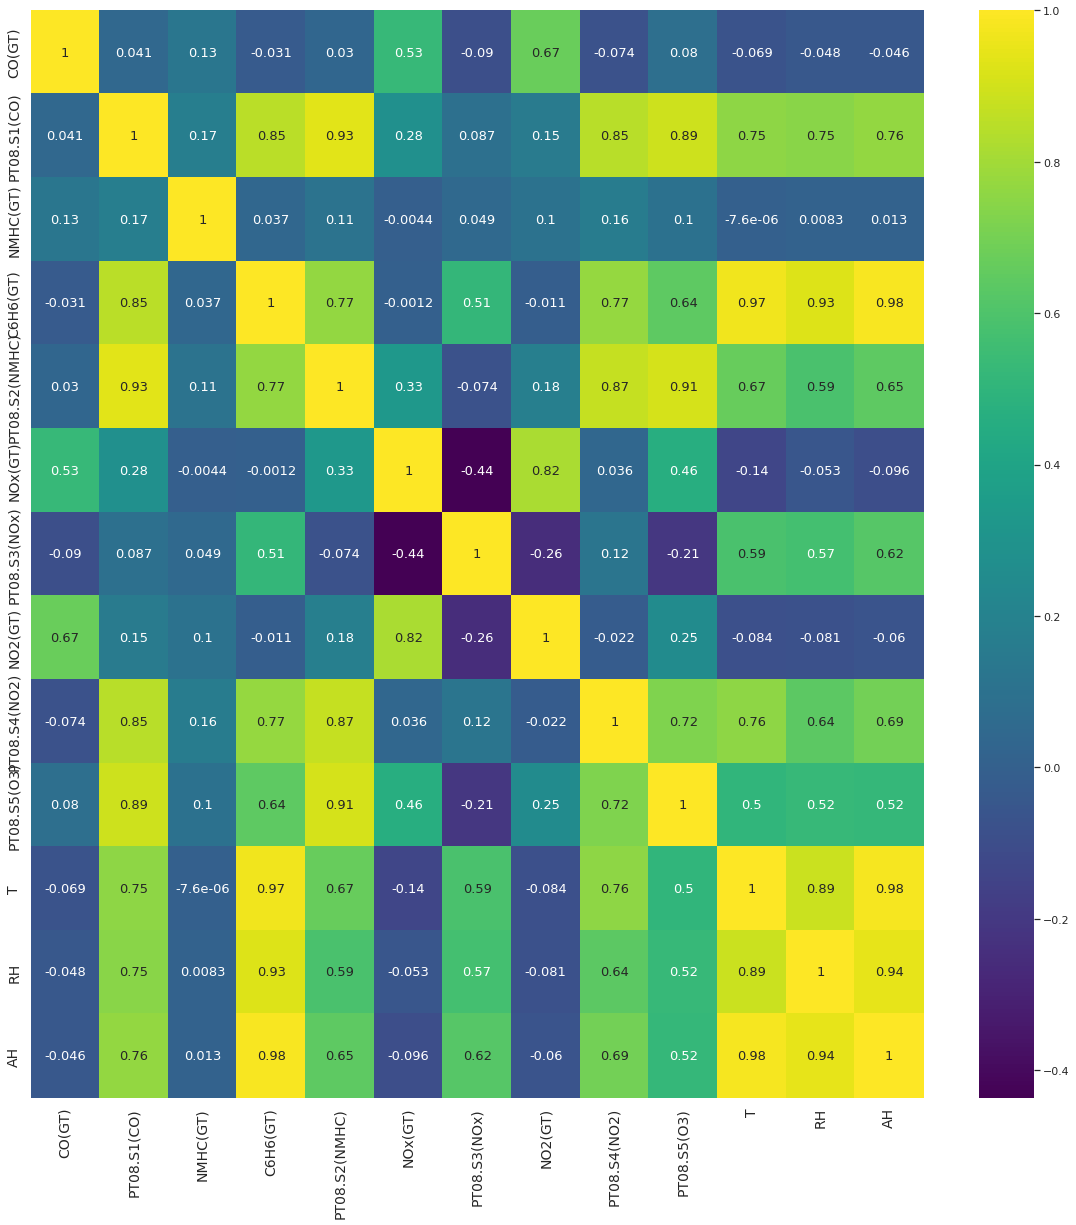

In [ ]:
#checking the relationship between all the features with the target (Quality)
'''zeromask = np.zeros_like(df.corr()) #creates an array of zeros
triangle_indices = np.triu_indices_from(zeromask)
zeromask[triangle_indices] = True'''

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, annot_kws={'size': 13},cmap='viridis')
sns.set_style('whitegrid')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

# MODEL SELECTION AND METHODOLOGY

In [ ]:
lm=LinearRegression()

## INITIAL 10 MODELS

In [ ]:
y= df['RH']
out_put1_error =[]
out_put1_accuracy = []
for i in [ 'CO(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','AH']:
  x1 = df[[i]]
  x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.33, random_state=42)
  lm.fit(x_train,y_train)
  prediction = lm.predict(x_test)
  print()
  print("The root mean squared error when ",i," is used as an idependent variable is ", np.sqrt(mean_squared_error(y_test,prediction)))
  out_put1_error.append(np.sqrt(mean_squared_error(y_test,prediction)))
  print('accuracy of your prediction when',i,"is used as a independent variable for  prediction is ",end=' ')
  print(r2_score(y_test,prediction)*100,end='')
  print('%')
  out_put1_accuracy.append(r2_score(y_test,prediction)*100)



The root mean squared error when  CO(GT)  is used as an idependent variable is  50.70334136056733
accuracy of your prediction when CO(GT) is used as a independent variable for  prediction is  0.30951480227909833%

The root mean squared error when  C6H6(GT)  is used as an idependent variable is  19.559300740026703
accuracy of your prediction when C6H6(GT) is used as a independent variable for  prediction is  85.16501205552149%

The root mean squared error when  PT08.S2(NMHC)  is used as an idependent variable is  41.5145962304052
accuracy of your prediction when PT08.S2(NMHC) is used as a independent variable for  prediction is  33.168349665770826%

The root mean squared error when  NOx(GT)  is used as an idependent variable is  50.68118647573567
accuracy of your prediction when NOx(GT) is used as a independent variable for  prediction is  0.39661551900134207%

The root mean squared error when  PT08.S3(NOx)  is used as an idependent variable is  41.54280923730484
accuracy of your predi

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


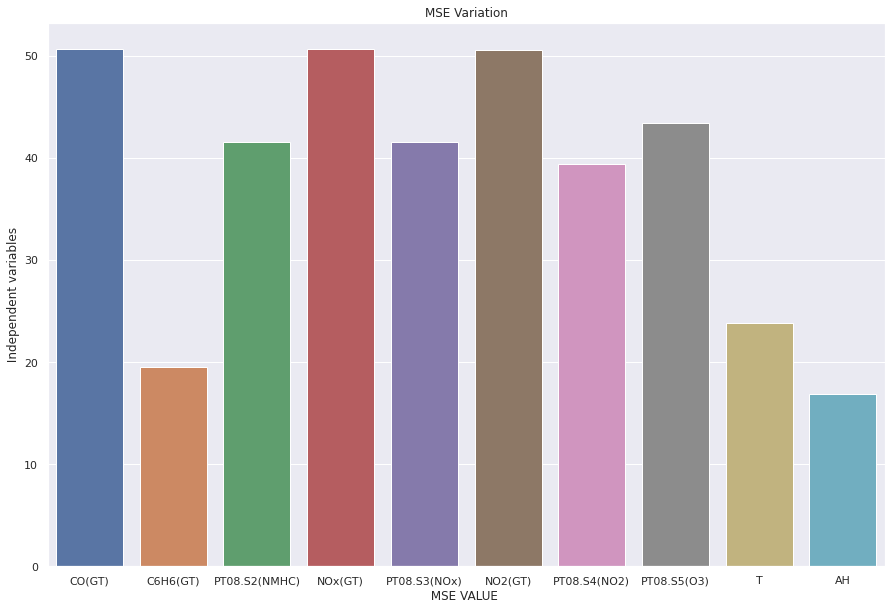

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


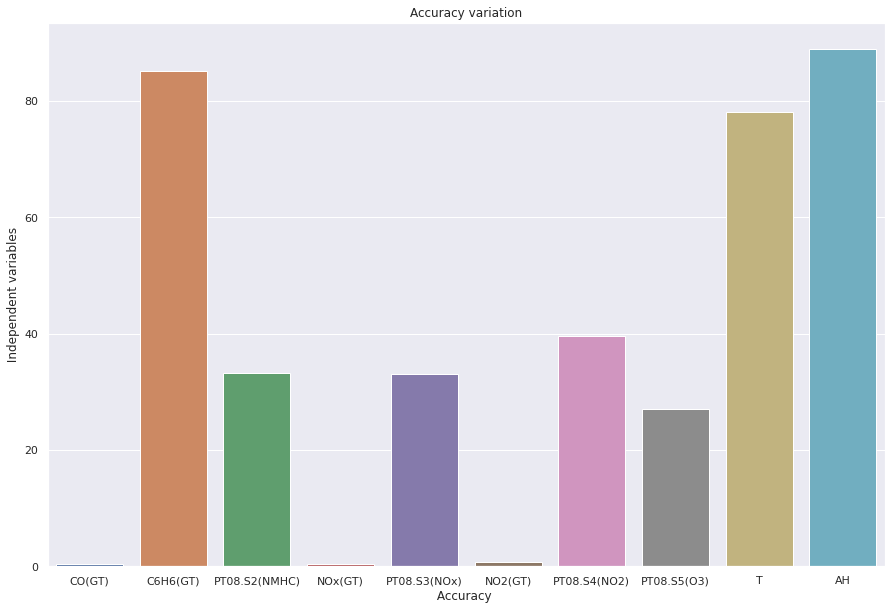

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style('ticks')
sns.set(font_scale = 1)
x = [ 'CO(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','AH']
y = out_put1_error
o = sns.barplot(x,y)
o.set_xlabel(" MSE VALUE  ")
o.set_ylabel(" Independent variables ")
o.set_title("MSE Variation")
plt.show()
sns.set_style('ticks')
sns.set(font_scale = 1)
x = [ 'CO(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','AH']
y = out_put1_accuracy
o = sns.barplot(x,y)
o.set_xlabel(" Accuracy  ")
o.set_ylabel(" Independent variables ")
o.set_title("Accuracy variation")
plt.show()

## NEXT 9 MODELS

In [ ]:
x2= [ 'CO(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','AH']
input1=[]
out_put_2_error=[]
out_put_2_accuracy =[]
for i in range(len(x2)-2+1):
  input1.append("set "+str(i+1))
  x21 = df[[x2[i],x2[i+1]]]
  y=df['RH']
  x_train,x_test,y_train,y_test=train_test_split(x21,y,test_size=0.33, random_state=42)
  lm.fit(x_train,y_train)
  prediction = lm.predict(x_test)
  print("The rms value of error when ",x2[i],x2[i+1]," are taken as the independent variables is ",np.sqrt(mean_squared_error(y_test,prediction)))
  print("The accuracy of prediction when ",x2[i],",",x2[i+1]," are taken as the independent variables is",end=" ")
  print(r2_score(y_test,prediction)*100,end='')
  print('%')
  out_put_2_error.append(np.sqrt(mean_squared_error(y_test,prediction)))
  out_put_2_accuracy.append(r2_score(y_test,prediction)*100)
  print()

The rms value of error when  CO(GT) C6H6(GT)  are taken as the independent variables is  19.52329325401693
The accuracy of prediction when  CO(GT) , C6H6(GT)  are taken as the independent variables is 85.21958240444214%

The rms value of error when  C6H6(GT) PT08.S2(NMHC)  are taken as the independent variables is  16.689651054795295
The accuracy of prediction when  C6H6(GT) , PT08.S2(NMHC)  are taken as the independent variables is 89.19872403382183%

The rms value of error when  PT08.S2(NMHC) NOx(GT)  are taken as the independent variables is  39.295998655004
The accuracy of prediction when  PT08.S2(NMHC) , NOx(GT)  are taken as the independent variables is 40.1206317794819%

The rms value of error when  NOx(GT) PT08.S3(NOx)  are taken as the independent variables is  40.151572150941654
The accuracy of prediction when  NOx(GT) , PT08.S3(NOx)  are taken as the independent variables is 37.484795118199045%

The rms value of error when  PT08.S3(NOx) NO2(GT)  are taken as the independent 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


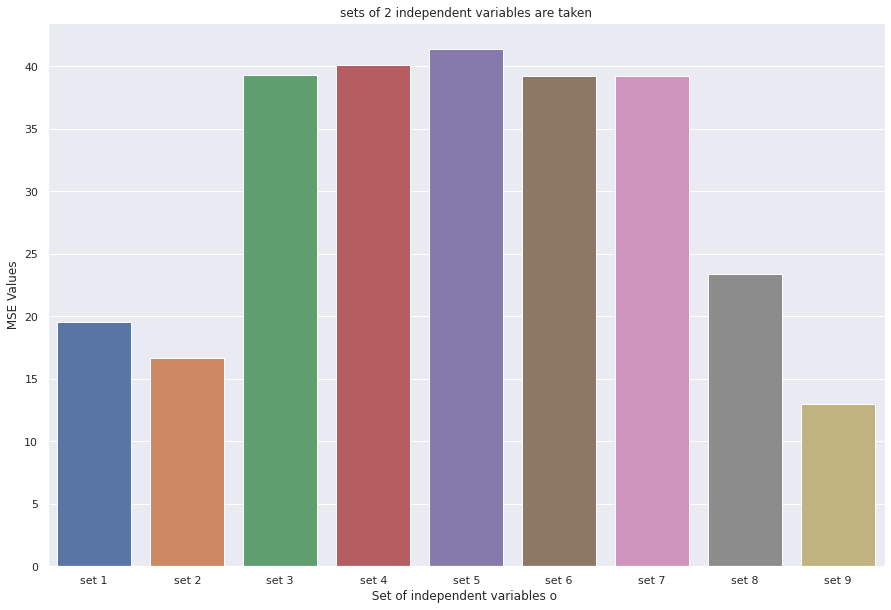

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


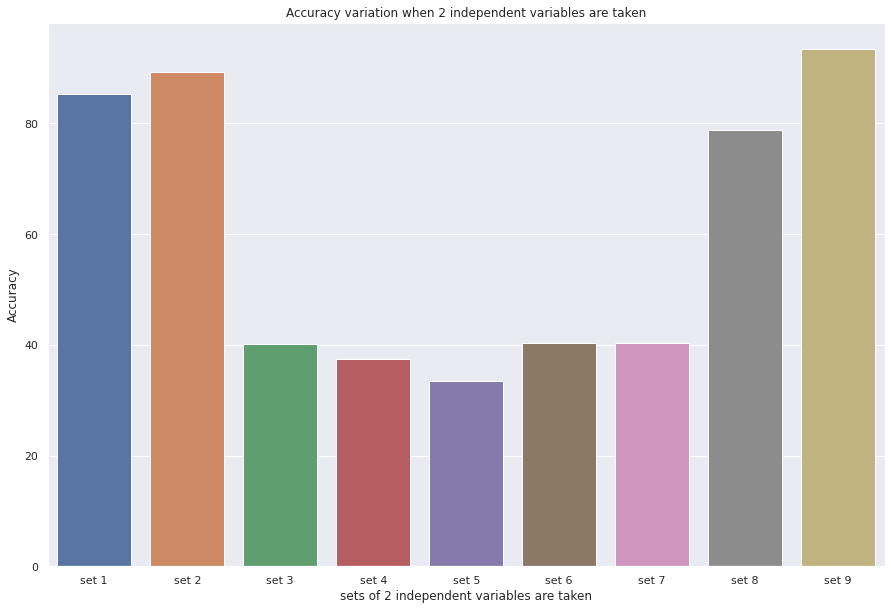

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style('ticks')
sns.set(font_scale = 1)
y = out_put_2_error
o = sns.barplot(input1,y)
o.set_xlabel(" Set of independent variables o  ")
o.set_ylabel(" MSE Values ")
o.set_title("sets of 2 independent variables are taken")
plt.show()
sns.set_style('ticks')
sns.set(font_scale = 1)
y = out_put_2_accuracy
o = sns.barplot(input1,y)
o.set_xlabel("sets of 2 independent variables are taken")
o.set_ylabel("Accuracy")
o.set_title("Accuracy variation when 2 independent variables are taken")
plt.show()

## NEXT 8 MODELS

In [ ]:
x2= [ 'CO(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','AH']
input1=[]
out_put3_MSE = []
out_put3_Accuracy=[]
for i in range(len(x2)-3+1):
  input1.append("set "+str(i+1))
  x21 = df[[x2[i],x2[i+1],x2[i+2]]]
  y=df['RH']
  x_train,x_test,y_train,y_test=train_test_split(x21,y,test_size=0.33, random_state=42)
  lm.fit(x_train,y_train)
  prediction = lm.predict(x_test)
  print("The rms value of error when ",x2[i],",",x2[i+1],",",x2[i+2]," are taken as the independent variables is ",np.sqrt(mean_squared_error(y_test,prediction)))
  print("The accuracy of prediction when ",x2[i],",",x2[i+1],",",x2[i+2]," are taken as the independent variables is",end=" ")
  print(r2_score(y_test,prediction)*100,end='')
  print('%')
  print()
  out_put3_MSE.append(np.sqrt(mean_squared_error(y_test,prediction)))
  out_put3_Accuracy.append(r2_score(y_test,prediction))


The rms value of error when  CO(GT) , C6H6(GT) , PT08.S2(NMHC)  are taken as the independent variables is  16.689067831782264
The accuracy of prediction when  CO(GT) , C6H6(GT) , PT08.S2(NMHC)  are taken as the independent variables is 89.19947892589518%

The rms value of error when  C6H6(GT) , PT08.S2(NMHC) , NOx(GT)  are taken as the independent variables is  16.40679364945515
The accuracy of prediction when  C6H6(GT) , PT08.S2(NMHC) , NOx(GT)  are taken as the independent variables is 89.5617431086466%

The rms value of error when  PT08.S2(NMHC) , NOx(GT) , PT08.S3(NOx)  are taken as the independent variables is  26.620366047017214
The accuracy of prediction when  PT08.S2(NMHC) , NOx(GT) , PT08.S3(NOx)  are taken as the independent variables is 72.52051463550009%

The rms value of error when  NOx(GT) , PT08.S3(NOx) , NO2(GT)  are taken as the independent variables is  39.007756695906686
The accuracy of prediction when  NOx(GT) , PT08.S3(NOx) , NO2(GT)  are taken as the independent v

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


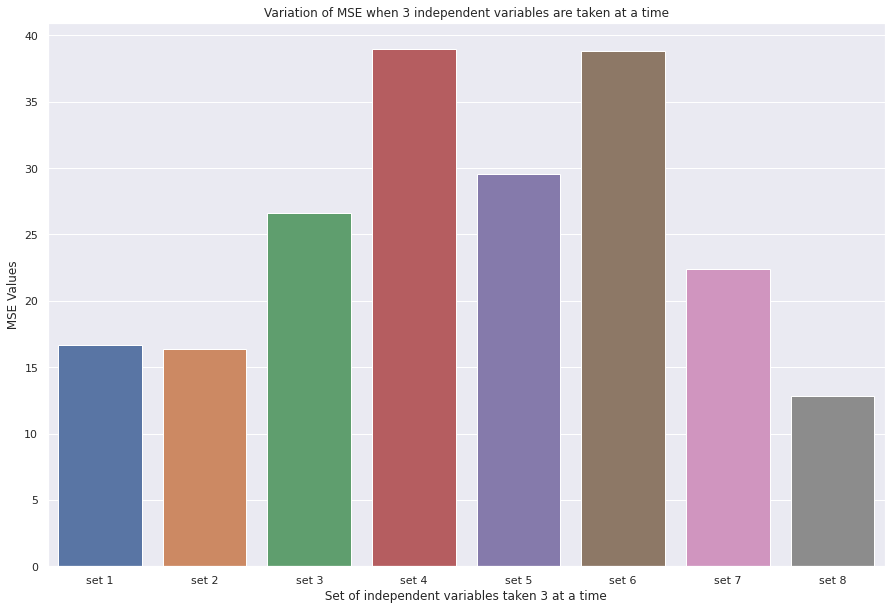

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Variation of Accuracy when 3 independent variables are taken at a time')

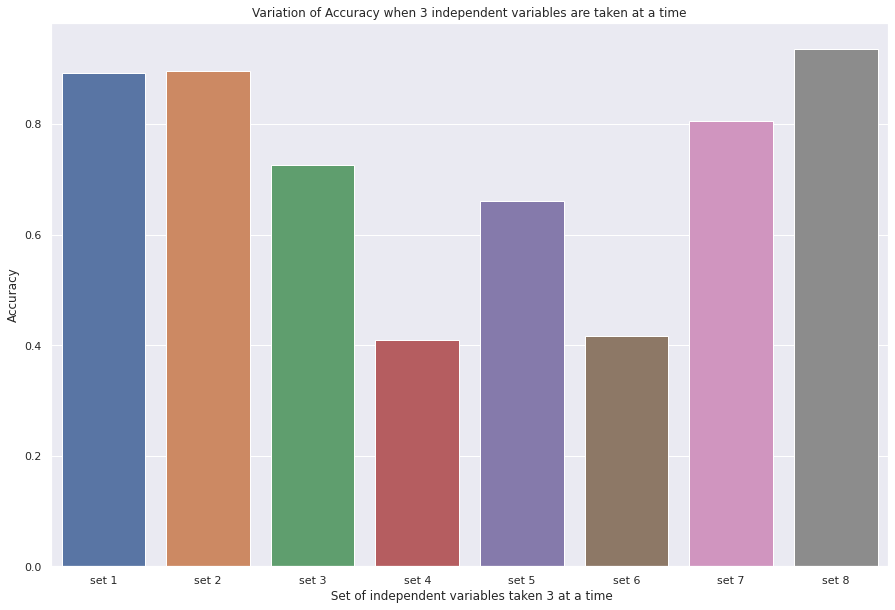

In [ ]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set_style('ticks')
sns.set(font_scale = 1)
y=out_put3_MSE
x=input1
o=sns.barplot(x,y)
o.set_xlabel(" Set of independent variables taken 3 at a time ")
o.set_ylabel(" MSE Values ")
o.set_title("Variation of MSE when 3 independent variables are taken at a time")
plt.show()

y = out_put3_Accuracy
o = sns.barplot(x,y)
o.set_xlabel(" Set of independent variables taken 3 at a time")
o.set_ylabel("Accuracy")
o.set_title("Variation of Accuracy when 3 independent variables are taken at a time")


## MODEL WITH EVERY INDEPENDENT FEATURES

The RMS error when every independent variables are used for prediction is  8.067496581861857
accuracy of your prediction whwn every independent variable is considered for prediction is 97.47618144392487%


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


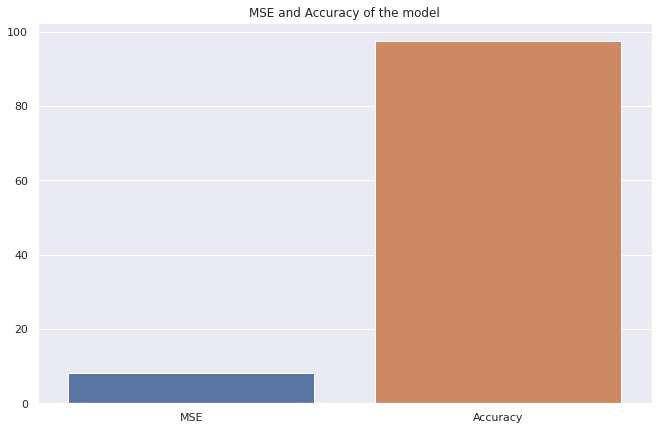

In [ ]:
x=df[[ 'CO(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','AH']]
y=df['RH']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33, random_state=42)
lm.fit(x_train,y_train)
prediction = lm.predict(x_test)
print("The RMS error when every independent variables are used for prediction is ",np.sqrt(mean_squared_error(y_test,prediction)))
print('accuracy of your prediction whwn every independent variable is considered for prediction is',end=' ')
print(r2_score(y_test,prediction)*100,end='')
print('%')

sns.set(rc={'figure.figsize':(11,7)})
sns.set_style('ticks')
sns.set(font_scale = 1)
y=[np.sqrt(mean_squared_error(y_test,prediction)),r2_score(y_test,prediction)*100]
x = ['MSE','Accuracy']
o=sns.barplot(x,y)
o.set_title("MSE and Accuracy of the model")
plt.show()

## POLYNOMIAL REGRESSION OF DEGREE 2

The RMS error when every independent variables are used for prediction is  8.067496581861857
accuracy of your prediction whwn every independent variable is considered for prediction is 97.47618144392487%



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


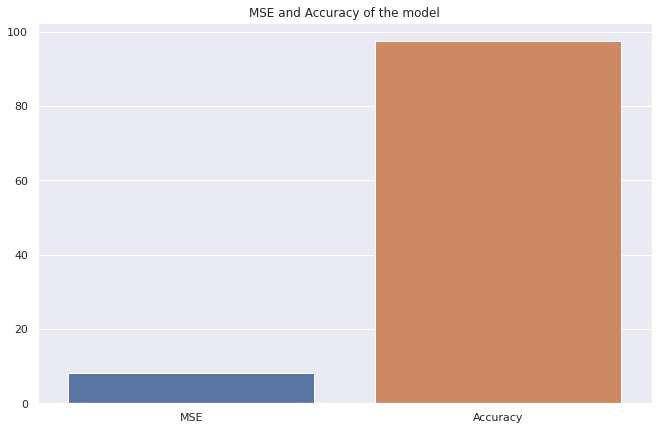

In [ ]:
x=df[[ 'CO(GT)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','AH']]
poly_accuracy=[]
poly_MSE=[]
degree1=[]
y=df['RH']
from sklearn.preprocessing import PolynomialFeatures
poly_function = PolynomialFeatures(degree=2)
poly_features = poly_function.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.33, random_state=42)
lm.fit(x_train,y_train)
print("The RMS error when every independent variables are used for prediction is ",np.sqrt(mean_squared_error(y_test,prediction)))
print('accuracy of your prediction whwn every independent variable is considered for prediction is',end=' ')
print(r2_score(y_test,prediction)*100,end='')
print('%')
print()

sns.set(rc={'figure.figsize':(11,7)})
sns.set_style('ticks')
sns.set(font_scale = 1)
y=[np.sqrt(mean_squared_error(y_test,prediction)),r2_score(y_test,prediction)*100]
x = ['MSE','Accuracy']
o=sns.barplot(x,y)
o.set_title("MSE and Accuracy of the model")
plt.show()